r = 102316004





*   r mod 7 = 102316004 mod 7 = 0
*   r mod 5 = 102316004 mod 5 = 4






*   a_r = 0.05 × 0 = 0
*   b_r = 0.3 × (4 + 1) = 1.5



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Upload CSV manually in Colab
df = pd.read_csv("/content/data.csv", encoding='latin1')

# Display first few rows
df.head()

/tmp/ipython-input-886444185.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data.csv", encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
# Extract NO2 values and remove missing entries
x = df["no2"].dropna().values

print("Number of valid NO2 samples:", len(x))


Number of valid NO2 samples: 419509


In [ ]:
a_r = 0
b_r = 1.5


In [ ]:
# Transformation: z = x + a_r * sin(b_r * x)
z = x + a_r * np.sin(b_r * x)


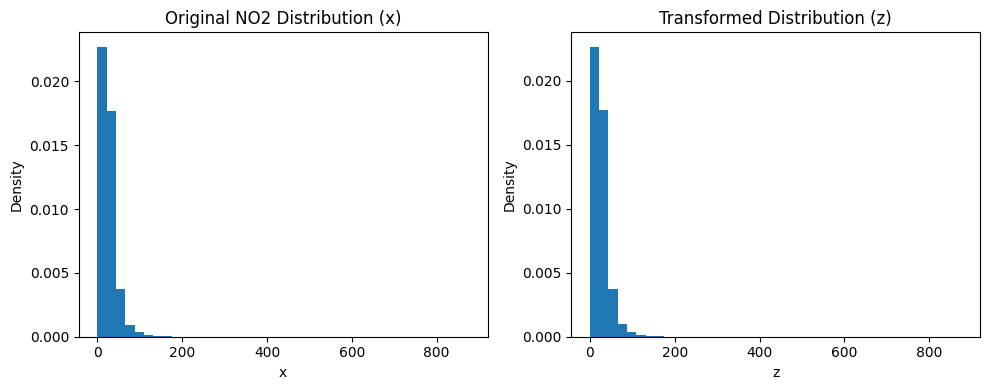

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(x, bins=40, density=True)
plt.title("Original NO2 Distribution (x)")
plt.xlabel("x")
plt.ylabel("Density")

plt.subplot(1,2,2)
plt.hist(z, bins=40, density=True)
plt.title("Transformed Distribution (z)")
plt.xlabel("z")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


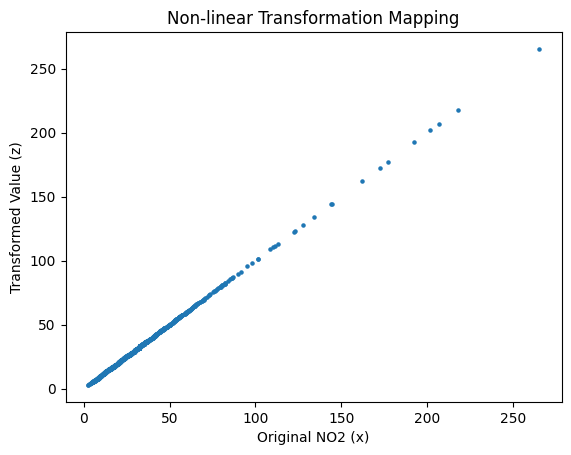

In [ ]:
plt.figure()
plt.scatter(x[:2000], z[:2000], s=5)
plt.xlabel("Original NO2 (x)")
plt.ylabel("Transformed Value (z)")
plt.title("Non-linear Transformation Mapping")
plt.show()


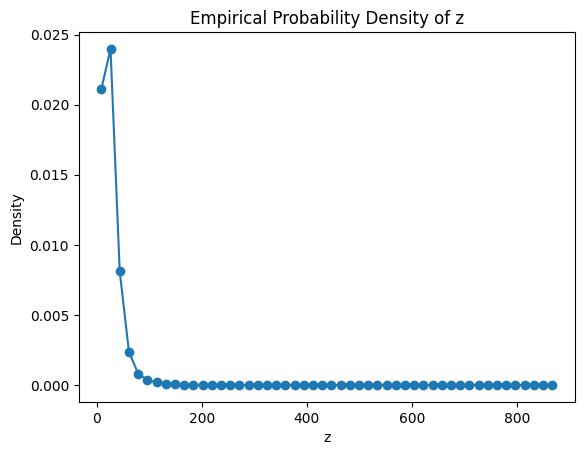

In [ ]:
hist_vals, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure()
plt.plot(bin_centers, hist_vals, marker='o')
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Empirical Probability Density of z")
plt.show()


In [ ]:
def pdf_model(z, lam, mu, c):
    return c * np.exp(-lam * (z - mu)**2)


In [ ]:
mu_est = np.mean(z)
var_est = np.var(z)

lam_est = 1 / (2 * var_est)
c_est = 1 / np.sqrt(np.pi / lam_est)

print("Initial Estimates")
print("lambda =", lam_est)
print("mu =", mu_est)
print("c =", c_est)


Initial Estimates
lambda = 0.001460577420359888
mu = 25.81266175882587
c = 0.021561916251515555


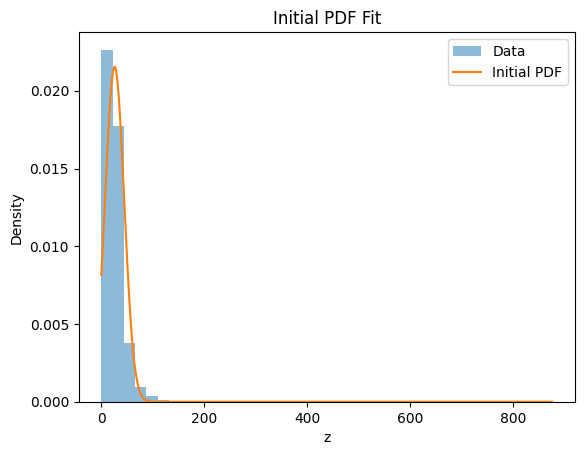

In [ ]:
z_vals = np.linspace(min(z), max(z), 400)
p_initial = pdf_model(z_vals, lam_est, mu_est, c_est)

plt.figure()
plt.hist(z, bins=40, density=True, alpha=0.5, label="Data")
plt.plot(z_vals, p_initial, label="Initial PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Initial PDF Fit")
plt.legend()
plt.show()


In [ ]:
# Unbiased variance estimator (MLE-inspired)
var_refined = np.sum((z - mu_est)**2) / (len(z) - 1)

lam_refined = 1 / (2 * var_refined)
c_refined = 1 / np.sqrt(np.pi / lam_refined)

print("Refined Estimates")
print("lambda =", lam_refined)
print("mu =", mu_est)
print("c =", c_refined)


Refined Estimates
lambda = 0.0014605739387244035
mu = 25.81266175882587
c = 0.021561890552508973


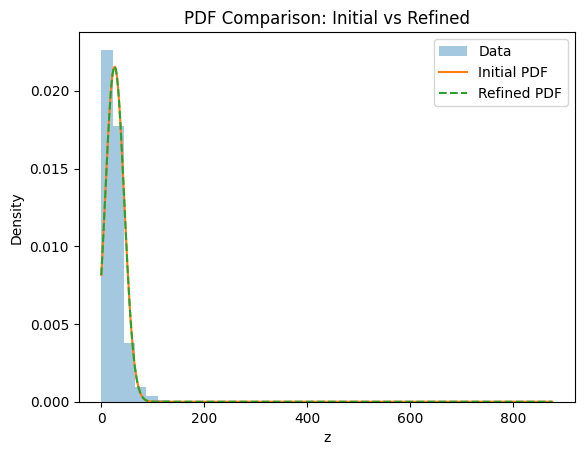

In [ ]:
p_refined = pdf_model(z_vals, lam_refined, mu_est, c_refined)

plt.figure()
plt.hist(z, bins=40, density=True, alpha=0.4, label="Data")
plt.plot(z_vals, p_initial, label="Initial PDF")
plt.plot(z_vals, p_refined, linestyle='--', label="Refined PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.title("PDF Comparison: Initial vs Refined")
plt.legend()
plt.show()


In [ ]:
p_empirical = pdf_model(bin_centers, lam_refined, mu_est, c_refined)
mse = np.mean((hist_vals - p_empirical)**2)

print("Mean Squared Error of Density Fit:", mse)


Mean Squared Error of Density Fit: 1.7009047984455657e-06


In [ ]:
print("FINAL PARAMETERS FOR SUBMISSION")
print("lambda =", lam_refined)
print("mu =", mu_est)
print("c =", c_refined)


FINAL PARAMETERS FOR SUBMISSION
lambda = 0.0014605739387244035
mu = 25.81266175882587
c = 0.021561890552508973


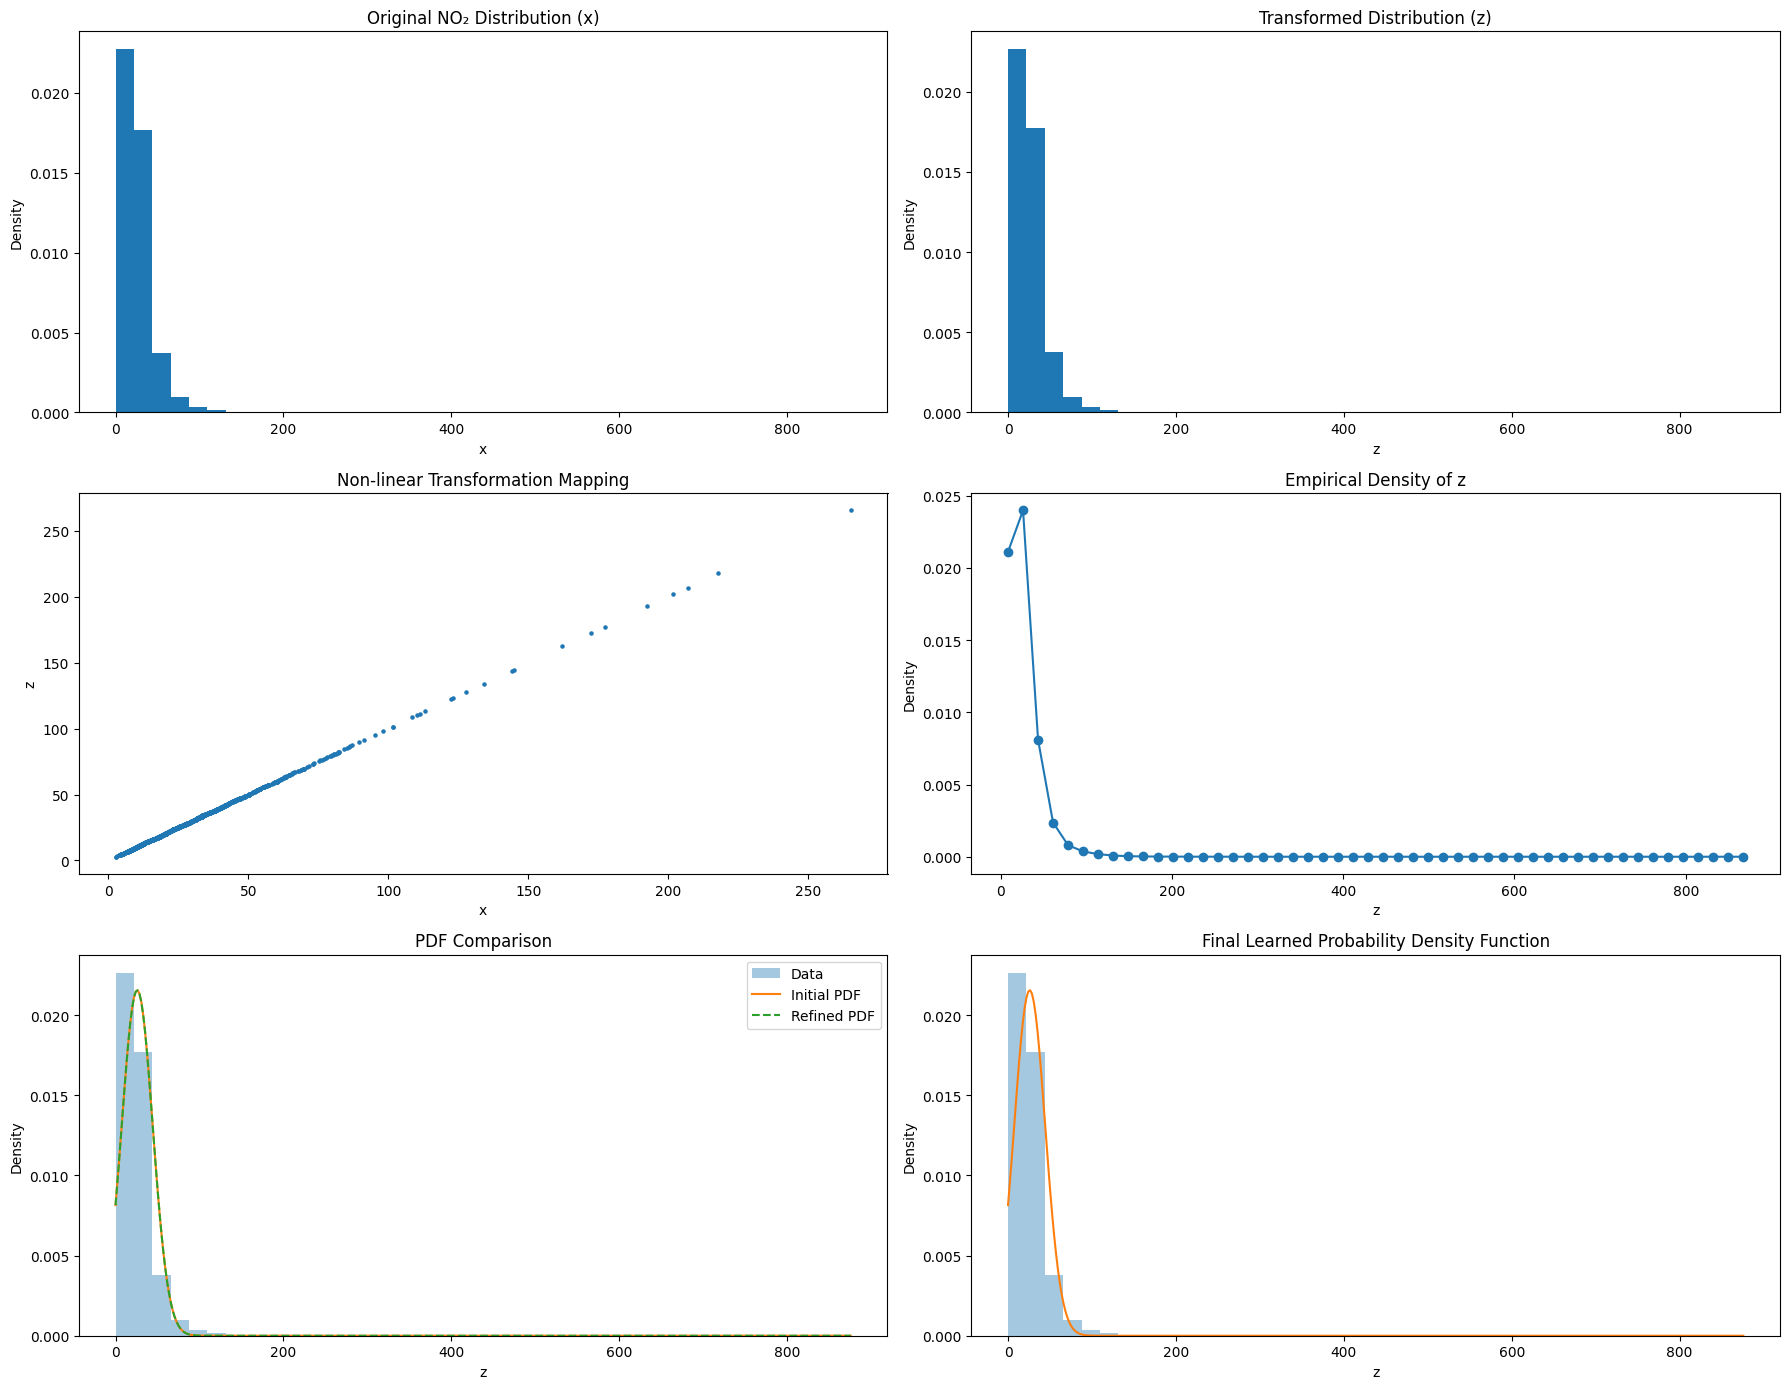

Image saved as final_visualization.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(18, 14))

# --------------------------------------------------
# 1. Original NO2 Distribution
# --------------------------------------------------
plt.subplot(3, 2, 1)
plt.hist(x, bins=40, density=True)
plt.title("Original NO₂ Distribution (x)")
plt.xlabel("x")
plt.ylabel("Density")

# --------------------------------------------------
# 2. Transformed Distribution
# --------------------------------------------------
plt.subplot(3, 2, 2)
plt.hist(z, bins=40, density=True)
plt.title("Transformed Distribution (z)")
plt.xlabel("z")
plt.ylabel("Density")

# --------------------------------------------------
# 3. Transformation Scatter Plot
# --------------------------------------------------
plt.subplot(3, 2, 3)
plt.scatter(x[:2000], z[:2000], s=5)
plt.title("Non-linear Transformation Mapping")
plt.xlabel("x")
plt.ylabel("z")

# --------------------------------------------------
# 4. Empirical Density of z
# --------------------------------------------------
plt.subplot(3, 2, 4)
plt.plot(bin_centers, hist_vals, marker='o')
plt.title("Empirical Density of z")
plt.xlabel("z")
plt.ylabel("Density")

# --------------------------------------------------
# 5. Initial vs Refined PDF
# --------------------------------------------------
plt.subplot(3, 2, 5)
plt.hist(z, bins=40, density=True, alpha=0.4, label="Data")
plt.plot(z_vals, p_initial, label="Initial PDF")
plt.plot(z_vals, p_refined, linestyle='--', label="Refined PDF")
plt.title("PDF Comparison")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()

# --------------------------------------------------
# 6. Final PDF Only (Clean)
# --------------------------------------------------
plt.subplot(3, 2, 6)
plt.hist(z, bins=40, density=True, alpha=0.4)
plt.plot(z_vals, p_refined)
plt.title("Final Learned Probability Density Function")
plt.xlabel("z")
plt.ylabel("Density")

# --------------------------------------------------
# Save figure
# --------------------------------------------------
plt.tight_layout()
plt.savefig("final_visualization.png", dpi=300)
plt.show()

print("Image saved as final_visualization.png")
